Normality is a crucial part of statistical analysis, and  playing an important role in determining which methods and tests to apply. Many statistical models, such as t-tests and ANOVA, rely on the assumption that data follows a normal distribution. Deviations from normality can lead to misleading results, making it essential to assess the distribution of your data before analysis.

In this article, we’ll explore why normality matters, how to test for it using descriptive statistics, statistical methods, and visualizations. Let’s dive into the importance of understanding your data's distribution and ensuring your analysis is built on a solid foundation.


# 1.What is Normality
Normality refers to the condition where data follows a [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution), also known as a Gaussian distribution. A normal distribution has the following characteristics:

- Symmetry: The data is symmetrically distributed around the mean (bell-shaped curve).
- Central Tendency: Mean = Median = Mode.
- Rule: Approximately:
    - 68% of the data falls within 1 standard deviation (σ) of the mean.
    - 95% within 2σ.
    - 99.7% within 3σ.
    

![Normal distribution](staticFiles/NormalDistribution.png)



# 2.Why Normality Matters
Test of the normality is an important step for deciding the measures of central tendency and statistical methods for data analysis. When our data follow normal distribution, parametric tests can be applied, otherwise nonparametric methods are used to compare the groups. keep in mind that:

- Many statistical tests (e.g., t-tests, ANOVA, regression) assume normality.
- It helps in making inferences about populations based on sample data.
- Deviations from normality can indicate issues like **outliers** or skewed distributions.



# 3.Datasets
Here are two datasets, one normal and one not normal

## Dataset 1: Normal Dataset
This dataset represents the productivity scores of employees in a company. 

Name: 
- Employee Productivity Scores

Features:

- EmployeeID: Unique ID for each employee.

- ProductivityScore: A score (0-100) which is  measuring employee productivity and it is normally distributed around a mean of 70 with a standard deviation of 10.

In [15]:
import pandas as pd
import numpy as np

# Generate normal dataset
np.random.seed(42)
employee_ids = range(1, 101)
productivity_scores = np.random.normal(loc=70, scale=10, size=100)  # Normal distribution

# Create a DataFrame
normal_data = pd.DataFrame({
    'EmployeeID': employee_ids,
    'ProductivityScore': np.clip(productivity_scores, 0, 100)  # Ensures scores are between 0 and 100
})

normal_data.head()

,EmployeeID,ProductivityScore
0,1,74.967142
1,2,68.617357
2,3,76.476885
3,4,85.230299
4,5,67.658466


## Dataset 2: Non-Normal Dataset
This dataset contains the purchase amounts of customers in a retail store. Purchase amounts often follow an exponential distribution.

Name: 
- Customer Purchase Amounts

Features:

- CustomerID: Unique ID for each customer.

- PurchaseAmount: Amount spent by a customer, with most values being small and a few large ones.

In [16]:
# Generate non-normal dataset
np.random.seed(42)
customer_ids = range(1, 101)  # 100 customers
purchase_amounts = np.random.exponential(scale=50, size=100)  # Exponential distribution

# Create a DataFrame
non_normal_data = pd.DataFrame({
    'CustomerID': customer_ids,
    'PurchaseAmount': np.round(purchase_amounts, 2)  # Rounds to 2 decimal places
})
non_normal_data.head()

,CustomerID,PurchaseAmount
0,1,23.46
1,2,150.51
2,3,65.84
3,4,45.65
4,5,8.48


## Overview of the Generated Datasets
Normal Dataset (Employee Productivity Scores):

- Mean: Around 70.
- Distribution: Symmetrical (bell-shaped curve).

Non-Normal Dataset (Customer Purchase Amounts):

- Mean: Skewed towards smaller amounts.
- Distribution: Positively skewed (exponential distribution).


# 3.Techniques to Check Normality

## 1. Descriptive Statistics

**Skewness: Measures asymmetry in the data distribution**

- Skewness = 0: Perfectly symmetric.

- Positive Skewness: Right-tailed.

- Negative Skewness: Left-tailed.

**Kurtosis: Indicates the "tailless" of the data distribution**

- Kurtosis = 3: Normal distribution.

- Kurtosis > 3: Heavy tails.

- Kurtosis < 3: Light tails.

In [17]:
from scipy.stats import skew, kurtosis

# Descriptive statistics for normal dataset
print("Normal Dataset: Employee Productivity Scores")
print("Skewness:", normal_data['ProductivityScore'].skew())
print("Kurtosis:", normal_data['ProductivityScore'].kurt())

# Descriptive statistics for non-normal dataset
print("\nNon-Normal Dataset: Customer Purchase Amounts")
print("Skewness:", non_normal_data['PurchaseAmount'].skew())
print("Kurtosis:", non_normal_data['PurchaseAmount'].kurt())


Normal Dataset: Employee Productivity Scores
Skewness: -0.17794814262595335
Kurtosis: -0.10097745347286491

Non-Normal Dataset: Customer Purchase Amounts
Skewness: 1.5227545575806063
Kurtosis: 2.13892787734344


### Insights
**Normal Dataset (Employee Productivity Scores):**

- Skewness (-0.1779): The data is nearly symmetric, as the skewness is close to 0.

- Kurtosis (-0.1009): The data has light tails, but is very close to a normal distribution (kurtosis of 0 for a standard normal).

**Non-Normal Dataset (Customer Purchase Amounts):**

- Skewness (1.5228): The data is positively skewed, meaning there is a long tail to the right (high-value purchases).

- Kurtosis (2.1389): Indicates tails that are slightly lighter than a normal distribution (kurtosis = 3 for a standard normal).

The Normal Dataset is well-behaved and closely matches a normal distribution, while the Non-Normal Dataset is clearly skewed and has characteristics of an exponential distribution, with more low values and a few high outliers.

## 2. Statistical Tests

**Shapiro-Wilk Test:**

- Checks if data follows a normal distribution.

- Null hypothesis: The data is normally distributed.

- p-value > 0.05: Fail to reject null (data is normal).

**Kolmogorov-Smirnov Test:**

- Compares sample distribution to a reference distribution (e.g., normal).

- p-value > 0.05: Data is normal.

**Anderson-Darling Test:**

- Measures how well data fits a specified distribution.

- Provides critical values; if the test statistic exceeds these values, normality is rejected.

In [18]:
from scipy.stats import shapiro, kstest, anderson

# Shapiro-Wilk Test
print("Shapiro-Wilk Test:")
print("Normal Dataset p-value:", shapiro(normal_data['ProductivityScore'])[1])
print("Non-Normal Dataset p-value:", shapiro(non_normal_data['PurchaseAmount'])[1])

# Kolmogorov-Smirnov Test
print("\nKolmogorov-Smirnov Test:")
print("Normal Dataset p-value:", kstest(normal_data['ProductivityScore'], 'norm')[1])
print("Non-Normal Dataset p-value:", kstest(non_normal_data['PurchaseAmount'], 'norm')[1])

# Anderson-Darling Test
print("\nAnderson-Darling Test:")
print("Normal Dataset:")
print(anderson(normal_data['ProductivityScore']))
print("\nNon-Normal Dataset:")
print(anderson(non_normal_data['PurchaseAmount']))


Shapiro-Wilk Test:
Normal Dataset p-value: 0.6551676754214818
Non-Normal Dataset p-value: 3.71200421420479e-09

Kolmogorov-Smirnov Test:
Normal Dataset p-value: 0.0
Non-Normal Dataset p-value: 3.8198675299792544e-130

Anderson-Darling Test:
Normal Dataset:
AndersonResult(statistic=0.25343395875111696, critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=68.96153482605907, scale=9.081684280078008)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

Non-Normal Dataset:
AndersonResult(statistic=4.885819325493216, critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=45.7371, scale=45.98919331327807)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


### Insights

#### 1.Shapiro-Wilk Test
**Normal Dataset p-value (0.6552):**

- Since the p-value is greater than 0.05, we fail to reject the null hypothesis, suggesting that the data is normally distributed.

**Non-Normal Dataset p-value (3.71e-09):**

- The p-value is significantly below 0.05, leading us to reject the null hypothesis. The data does not follow a normal distribution.


#### 2.Kolmogorov-Smirnov Test

**Normal Dataset p-value (0.0):**

- The test suggests the data is not normally distributed, but the Kolmogorov-Smirnov test is often sensitive to sample size and deviations.

**Non-Normal Dataset p-value (3.82e-130):**
 
- The p-value is extremely small, confirming that the data deviates significantly from a normal distribution.

#### 3.Anderson-Darling Test

**Normal Dataset (Statistic = 0.2534):**

- The test statistic (0.2534) is below all critical values (smallest is 0.555 for a 15% significance level). Thus, we fail to reject the null hypothesis, suggesting the data is normally distributed.

**Non-Normal Dataset (Statistic = 4.8858):**

- The test statistic (4.8858) exceeds all critical values (highest is 1.053 for a 1% significance level). This strongly indicates that the data does not follow a normal distribution.
Insight

## 3. Visual Techniques

**Histogram with KDE:**

- Plot the data’s distribution with a histogram and a KDE (Kernel Density Estimate) overlay to see the shape.

**Q-Q Plot (Quantile-Quantile):**

- Compare the quantiles of the data against a theoretical normal distribution.

**Boxplot:**
- Visualize the spread and detect skewness or outliers.

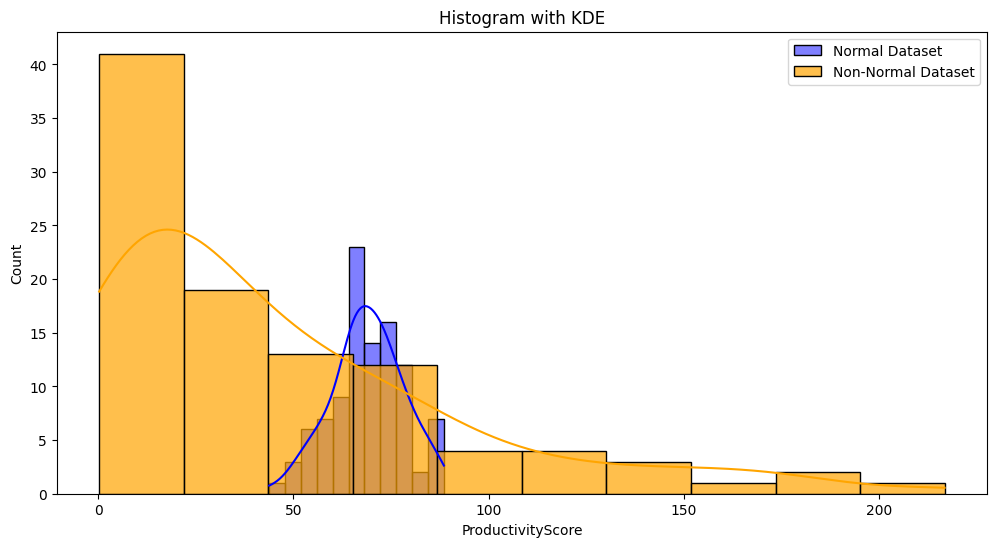

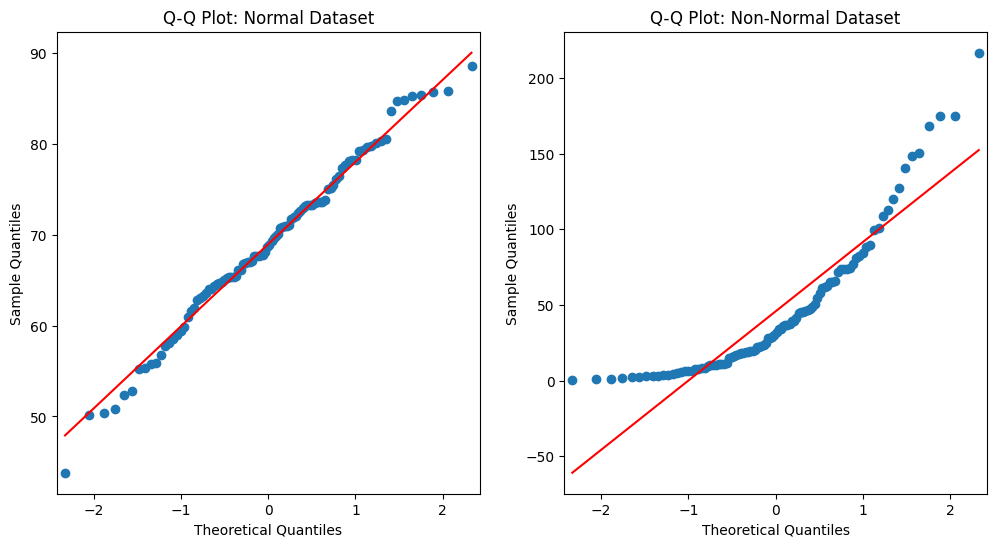

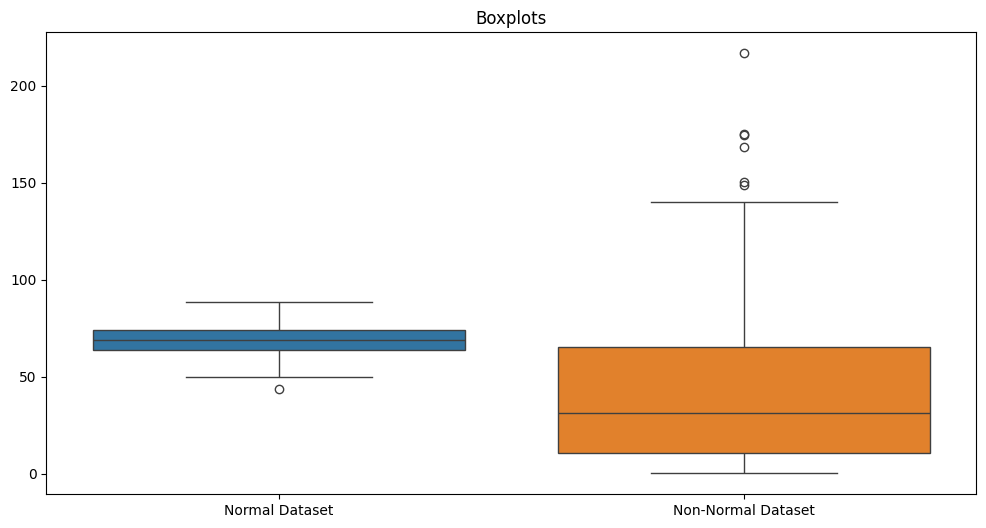

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

# Histogram with KDE
plt.figure(figsize=(12, 6))
sns.histplot(normal_data['ProductivityScore'], kde=True, color='blue', label='Normal Dataset')
sns.histplot(non_normal_data['PurchaseAmount'], kde=True, color='orange', label='Non-Normal Dataset', alpha=0.7)
plt.legend()
plt.title("Histogram with KDE")
plt.show()

# Q-Q Plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
qqplot(normal_data['ProductivityScore'], line='s', ax=plt.gca())
plt.title("Q-Q Plot: Normal Dataset")
plt.subplot(1, 2, 2)
qqplot(non_normal_data['PurchaseAmount'], line='s', ax=plt.gca())
plt.title("Q-Q Plot: Non-Normal Dataset")
plt.show()

# Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=[normal_data['ProductivityScore'], non_normal_data['PurchaseAmount']])
plt.xticks([0, 1], ['Normal Dataset', 'Non-Normal Dataset'])
plt.title("Boxplots")
plt.show()


### Insights
**1.Histogram with KDE**

**Normal Dataset (Employee Productivity Scores):**

- The histogram shows a bell-shaped curve, confirming that the data is symmetrically distributed around the mean.

- The KDE overlay aligns with the histogram, further supporting normality.


**Non-Normal Dataset (Customer Purchase Amounts):**

- The histogram is heavily right-skewed, with most values concentrated near the lower range and a long tail extending to the right.

- The KDE highlights the exponential nature of the distribution.

Histograms provide a quick overview of the data’s shape, with bell-shaped curves indicating normality and skewed shapes suggesting deviations.

**2. Q-Q Plot (Quantile-Quantile Plot)**

**Normal Dataset:**

- The data points align closely with the diagonal line, indicating that the quantiles of the dataset match those of a theoretical normal distribution.

**Non-Normal Dataset:**

- The data points significantly far from the diagonal line, particularly in the upper quantiles, reflecting the right-skewed nature of the data.

Q-Q plots are highly effective for detecting deviations from normality. A straight line indicates normality, while deviations suggest skewness or heavy tails.

**3. Boxplot**

**Normal Dataset:**

- The boxplot is symmetric, with the median line centered within the box and whiskers of approximately equal length. Also There are minimal outliers.

**Non-Normal Dataset:**

- The boxplot shows significant skewness, with a longer upper whisker and numerous outliers on the high end, reflecting the exponential distribution.

Boxplots visually summarize the data’s spread and symmetry, making it easy to identify skewness and outliers.

# 4.Summary of Techniques

| **Technique**          | **Purpose**                                         | **Interpretation**                              |
|-------------------------|-----------------------------------------------------|------------------------------------------------|
| **Skewness & Kurtosis** | Quantify asymmetry and "tailedness."                | Values close to 0 and 3 indicate normality.    |
| **Shapiro-Wilk**        | Statistical test for normality (small samples).     | p-value > 0.05: Normally distributed.          |
| **Kolmogorov-Smirnov**  | Test goodness-of-fit to a normal distribution.      | p-value > 0.05: Normally distributed.          |
| **Anderson-Darling**    | Test if data follows a normal distribution.         | Statistic below critical value: Normal.        |
| **Histogram + KDE**     | Visualize distribution shape.                       | Bell-shaped curve indicates normality.         |
| **Q-Q Plot**            | Compare quantiles to a normal distribution.         | Points align along the diagonal = normal.      |
| **Boxplot**             | Visualize spread and detect skewness or outliers.   | Symmetrical box with few outliers = normal.    |


# 5.Conclusion
Understanding normality is a fundamental step in data analysis, as it influences the choice of statistical methods and the reliability of insights derived from data. In this article, we explored the concept of normality, why it matters, and how to assess it using descriptive statistics, statistical tests, and visual techniques.


Keys include:

**1. The Role of Normality:**

- Many parametric statistical tests, such as t-tests and ANOVA, assume normality. Deviations from normality can lead to incorrect conclusions, making it essential to assess and address non-normal data appropriately.

**2.Datasets Examined:**

- The Employee Productivity Scores dataset closely follows a normal distribution, making it suitable for parametric analyses.

- The Customer Purchase Amounts dataset exhibits strong positive skewness, suggesting the need for non-parametric methods or transformations.

**3.Techniques to Check Normality** 

- Combining descriptive statistics, statistical tests (e.g., Shapiro-Wilk, Anderson-Darling), and visualizations (e.g., Q-Q plots, histograms) provides a robust framework for assessing normality.
 
Ultimately, whether your data is normal or non-normal, understanding its distribution allows you to make informed decisions about the most appropriate methods for analysis. For non-normal datasets, techniques like data transformation or non-parametric tests ensure the validity of your results.


As data scientists, recognizing the distributional properties of data is a critical skill, enabling us to adapt our approach and extract meaningful insights from diverse datasets. Whether you're analyzing productivity scores or customer purchases, the tools and methods discussed here provide a solid foundation for assessing and addressing normality in your data.

